In [27]:
import pandas as pd

In [28]:
data = pd.read_csv("/content/Bank_Campaign_Data.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Uploaded the loan sanction dataset


In [29]:
import numpy as np

In [30]:
# prompt: Please do label encoding for columns- Job, Marital, education, contact, month and poutcome on nominal scale

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Columns to perform label encoding
columns_to_encode = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Apply label encoding to each column
for col in columns_to_encode:
    data[col] = le.fit_transform(data[col])

data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,no,2143,yes,no,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,no,29,yes,no,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,no,2,yes,yes,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,no,1506,yes,no,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,no,1,no,no,2,5,8,198,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,no,825,no,no,0,17,9,977,3,-1,0,3,yes
45207,71,5,0,0,no,1729,no,no,0,17,9,456,2,-1,0,3,yes
45208,72,5,1,1,no,5715,no,no,0,17,9,1127,5,184,3,2,yes
45209,57,1,1,1,no,668,no,no,1,17,9,508,4,-1,0,3,no


This code generates the label encoded data for columns with more than 2 outcomes

In [31]:
# prompt: For the binary columns above, perform one-hot encoding

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data' DataFrame is already loaded and label encoded as in the previous example

# Identify binary columns (you might need to adjust this based on your actual data)
binary_cols = [col for col in data.columns if data[col].nunique() == 2]

# Initialize OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the binary columns
encoded_data = enc.fit_transform(data[binary_cols])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(binary_cols))

# Concatenate the encoded columns with the original DataFrame
data = pd.concat([data, encoded_df], axis=1)

# Drop the original binary columns (optional)
data = data.drop(columns=binary_cols)

data


,age,job,marital,education,balance,contact,day,month,duration,campaign,...,previous,poutcome,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
0,58,4,1,2,2143,2,5,8,261,1,...,0,3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,44,9,2,1,29,2,5,8,151,1,...,0,3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,33,2,1,1,2,2,5,8,76,1,...,0,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,47,1,1,3,1506,2,5,8,92,1,...,0,3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,33,11,2,3,1,2,5,8,198,1,...,0,3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,825,0,17,9,977,3,...,0,3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
45207,71,5,0,0,1729,0,17,9,456,2,...,0,3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
45208,72,5,1,1,5715,0,17,9,1127,5,...,3,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
45209,57,1,1,1,668,1,17,9,508,4,...,0,3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


This code is for one-hot encoding on columns with 2 outcomes which eventually creates dummy columns for the data encoded.

In [32]:
# checking for duplicates in data

data.duplicated().sum()

np.int64(0)

Checked for duplicate values in the dataset

In [33]:
# Check for missing values in the DataFrame
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
balance,0
contact,0
day,0
month,0
duration,0
campaign,0


Checked for missing values in the data

In [34]:
data.describe()

,age,job,marital,education,balance,contact,day,month,duration,campaign,...,previous,poutcome,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,1362.272058,0.640242,15.806419,5.523014,258.163080,2.763841,...,0.580323,2.559974,0.981973,0.018027,0.444162,0.555838,0.839774,0.160226,0.883015,0.116985
std,10.618762,3.272657,0.608230,0.747997,3044.765829,0.897951,8.322476,3.006911,257.527812,3.098021,...,2.303441,0.989059,0.133049,0.133049,0.496878,0.496878,0.366820,0.366820,0.321406,0.321406
min,18.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,72.000000,0.000000,8.000000,3.000000,103.000000,1.000000,...,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,448.000000,0.000000,16.000000,6.000000,180.000000,2.000000,...,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,1428.000000,2.000000,21.000000,8.000000,319.000000,3.000000,...,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,102127.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,...,275.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The code above highlights the summary statistics.

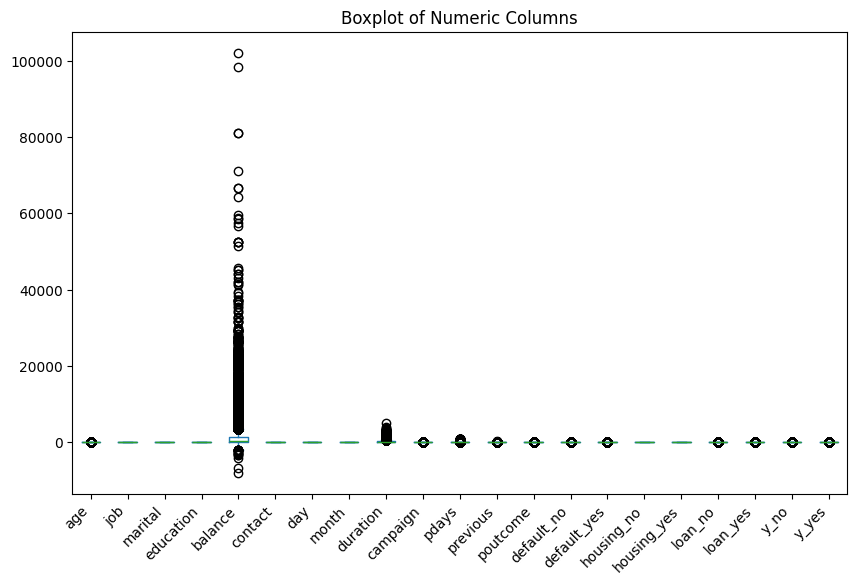

In [35]:
import matplotlib.pyplot as plt

# Select only numeric columns for the boxplot
numeric_cols = data.select_dtypes(include=np.number)

# Create the boxplot
numeric_cols.plot(kind='box', figsize=(10, 6))
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

The code above generates the boxplot to highlight outliers for the numerical columns.

In [36]:
# prompt: Treat the outliers for columns balance and duration using IQR method

def treat_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.clip(data[col], lower_bound, upper_bound)
    return data

# Apply IQR method to 'balance' and 'duration' columns
data = treat_outliers_iqr(data, 'balance')
data = treat_outliers_iqr(data, 'duration')


With the above generated boxplot, this code is a step further to treat the outliers visible for two specific columns of balance and duration.

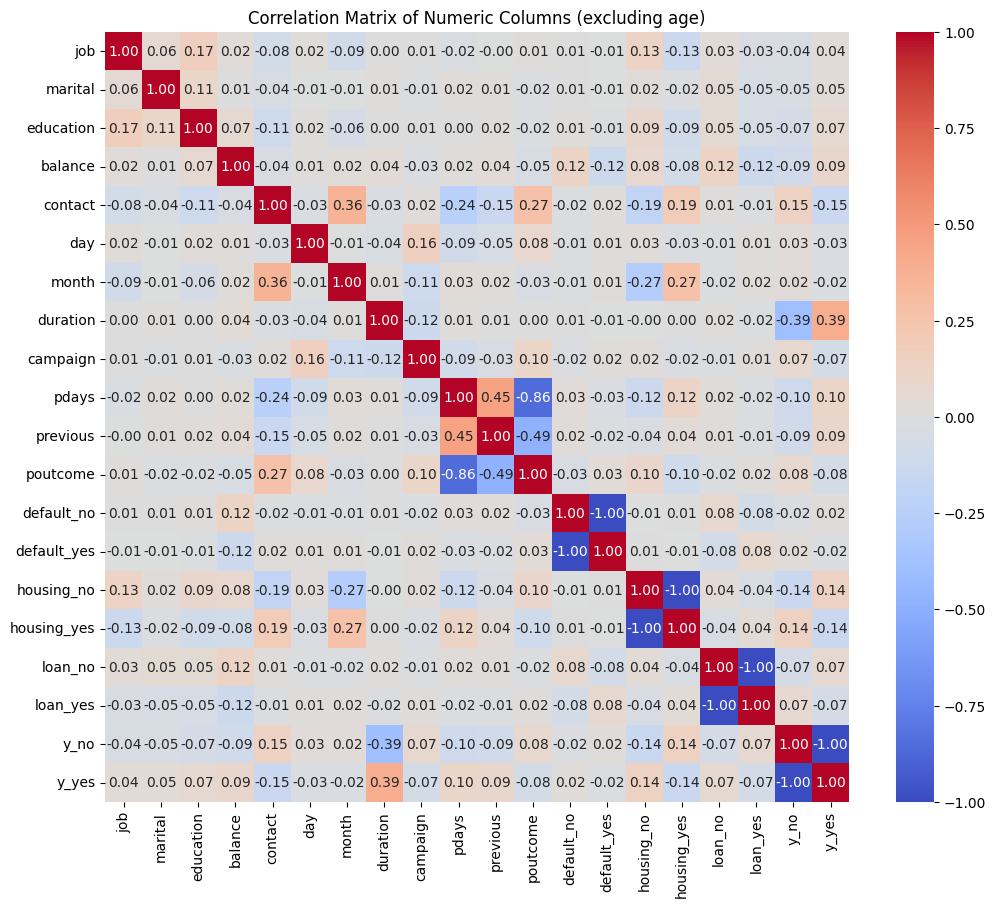

In [37]:
# prompt: Build correlation matrix using heatmap of all numeric columns except "age" column

import seaborn as sns
# Create the correlation matrix
corr_matrix = data.drop('age', axis=1).select_dtypes(include=np.number).corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns (excluding age)')
plt.show()


This code depicts the correlation matrix for all the numeric columns in the form of heatmap.

In [39]:
import statsmodels.api as sm

# Define dependent and independent variables
y_no = data['y_no'] # Accessing 'y_no' column
y_yes = data['y_yes'] # Accessing 'y_yes' column

# Assuming 'y' should be either 'y_no' or 'y_yes', choose one
y = y_no  # or y = y_yes

x = data.drop(columns=['y_no','y_yes','age'],axis=1)

The above code defines the dependent variable "y" and independent variable "x".

In [40]:
# Convert categorical features to numerical using one-hot encoding
x = pd.get_dummies(x, drop_first=True)

# Add a constant to the independent variables
x = sm.add_constant(x)

# Fit the logistic regression model
log_reg = sm.Logit(y, x).fit()

# Print the model summary
print(log_reg.summary())

         Current function value: 0.259734
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                   y_no   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                  0.2803
Time:                        12:31:07   Log-Likelihood:                -11743.
converged:                      False   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1929        nan        nan        nan         nan         nan
job            -0.0094      0.005     -1.749      0.080      -0.020       0.001
marital        -0.1545      0.028     -5.560    

This code showcases the logistic regression for dependent and independent variables using the statsmodel, indicating whether the variable defined is significant or not based on the logistic regression results by comparing p-values of each of the variables with alpha value 0.05

In [41]:
# Set the significance level (alpha)
alpha = 0.05

# Fit the logistic regression model first to get the initial result
model = sm.Logit(y, x)
result = model.fit()

# Get p-values from the model summary
p_values = result.pvalues

# Identify insignificant columns (p-value > alpha)
insignificant_cols = p_values[p_values > alpha].index

# Remove insignificant columns from the independent variables
x = x.drop(columns=insignificant_cols)

# Refit the model with the remaining columns
model = sm.Logit(y, x)
result = model.fit()

# Print the new model summary
print(result.summary())

         Current function value: 0.259734
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.259768
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                   y_no   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45196
Method:                           MLE   Df Model:                           14
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                  0.2802
Time:                        12:33:50   Log-Likelihood:                -11744.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1797        nan        nan        nan         nan         nan
marital        -0.1577   

The code gives the regression output after removing all the insignificant variables, indicating the result for significant variable having p-value less than alpha value (0.05).

In [42]:
# Set the significance level (alpha)
alpha = 0.05

# Fit the logistic regression model first to get the initial result
model = sm.Logit(y, x)
result = model.fit()

# Get p-values from the model summary
p_values = result.pvalues

# Identify insignificant columns (p-value > alpha)
insignificant_cols = p_values[p_values > alpha].index

# Remove insignificant columns from the independent variables
x = x.drop(columns=insignificant_cols)

# Refit the model with the remaining columns
model = sm.Logit(y, x)
result = model.fit()

# Print the new model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.259768
         Iterations 10
         Current function value: 0.269197
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                   y_no   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45196
Method:                           MLE   Df Model:                           14
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                  0.2540
Time:                        12:35:02   Log-Likelihood:                -12171.
converged:                      False   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6519   4.14e+05    6.4e-06      1.000   -8.12e+05    8.12e+05
marital        -0.1607      0.027     -5.880      0.000      -0.214      -0.107
education      -0.2443      0.023    -10.713    

The code gives the regression output after further removal of all the insignificant variables, indicating the result for significant variable having p-value less than alpha value (0.05).

In [43]:
# Set the significance level (alpha)
alpha = 0.05

# Fit the logistic regression model first to get the initial result
model = sm.Logit(y, x)
result = model.fit()

# Get p-values from the model summary
p_values = result.pvalues

# Identify insignificant columns (p-value > alpha)
insignificant_cols = p_values[p_values > alpha].index

# Remove insignificant columns from the independent variables
x = x.drop(columns=insignificant_cols)

# Refit the model with the remaining columns
model = sm.Logit(y, x)
result = model.fit()

# Print the new model summary
print(result.summary())

         Current function value: 0.269197
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.271033
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   y_no   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45198
Method:                           MLE   Df Model:                           12
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                  0.2490
Time:                        12:35:33   Log-Likelihood:                -12254.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
marital        -0.1727      0.027     -6.332      0.000      -0.226      -0.119
education      -0.2568    

The code gives the regression output after further removal of all the insignificant variables, indicating the result for significant variable having p-value less than alpha value (0.05).

In [44]:
# Set the significance level (alpha)
alpha = 0.05

# Fit the logistic regression model first to get the initial result
model = sm.Logit(y, x)
result = model.fit()

# Get p-values from the model summary
p_values = result.pvalues

# Identify insignificant columns (p-value > alpha)
insignificant_cols = p_values[p_values > alpha].index

# Remove insignificant columns from the independent variables
x = x.drop(columns=insignificant_cols)

# Refit the model with the remaining columns
model = sm.Logit(y, x)
result = model.fit()

# Print the new model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.271033
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.271068
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   y_no   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45199
Method:                           MLE   Df Model:                           11
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                  0.2489
Time:                        12:35:51   Log-Likelihood:                -12255.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
mari

The code gives the final regression output after further removal of all the insignificant variables, indicating the result for significant variable having p-value less than alpha value (0.05).





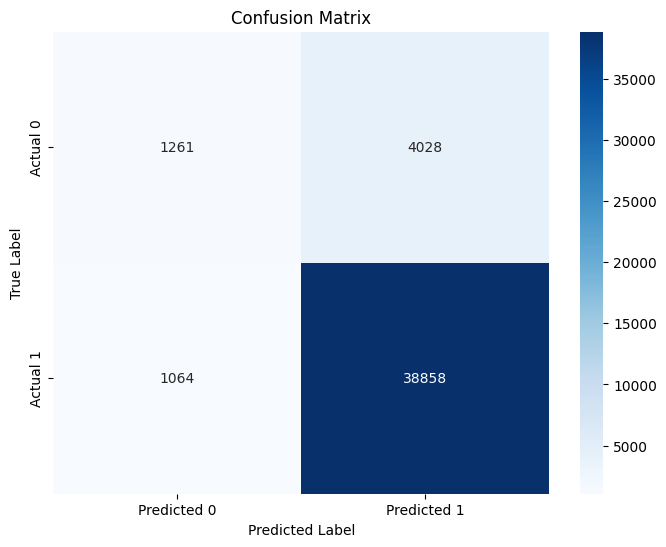

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y' is your true labels and 'result' is your refitted model

# Make predictions on the training data (you should ideally use a test set)
y_pred_prob = result.predict(x)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

# Create the confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

This code is for generating the confusion matrix which summarizes the performance of the classification model based on the regression results by comparing predicted labels with true labels.

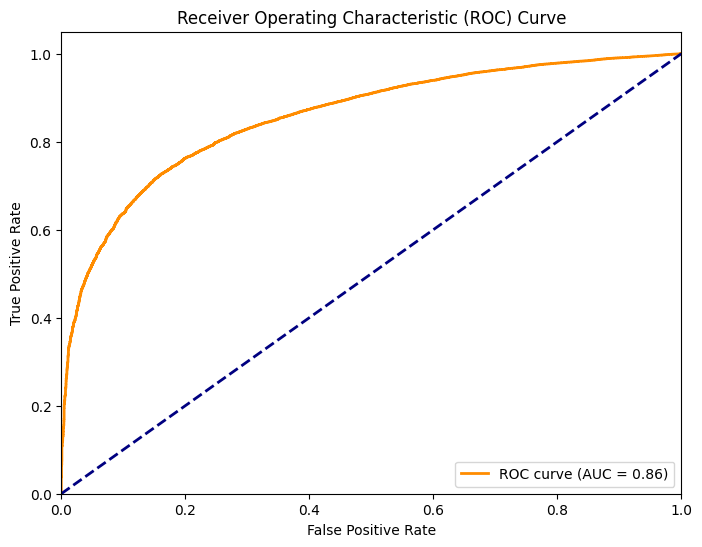

In [46]:
# prompt: Generate AUC with its related graph to measure the accuracy of the regression model implemented above for the dataset

from sklearn.metrics import roc_curve, auc

# Assuming 'y' is your true labels and 'y_pred_prob' is your predicted probabilities
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

This code depicts Area under Curve(AUC) which is the best tool to measure accuracy of the regression model and for this dataset AUC=0.86 which indicates that model is reliable as AUC is closer to 1.